<a href="https://colab.research.google.com/github/JahnaviKashyap19/MNIST-Image-Classification-Using-CNN/blob/main/MNIST_Image_Classification_Using_CNN.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Loading MNIST Dataset

In [3]:
import tensorflow
(xtrain_original, ytrain_original),(xvalid_original, yvalid_original)=tensorflow.keras.datasets.mnist.load_data()

11490434/11490434 [==============================] - 2s 0us/step


Checking number of images and dimensions

In [4]:
print("Training Dataset:")
print(xtrain_original.shape)
print(ytrain_original.shape)
print("Validation Data:")
print(xvalid_original.shape)
print(yvalid_original.shape)


Training Dataset:
(60000, 28, 28)
(60000,)
Validation Data:
(10000, 28, 28)
(10000,)


Visualize a random image and its label in the training set

In [5]:
#Taking 5th image
print(xtrain_original[5,6:24,6:24])

[[  0   0   0   0   0   0   0  33 151 208 252 252 252 146   0   0   0   0]
 [  0   0   0   0   0  40 152 244 252 253 224 211 252 232  40   0   0   0]
 [  0   0   0  15 152 239 252 252 252 216  31  37 252 252  60   0   0   0]
 [  0   0   0  96 252 252 252 252 217  29   0  37 252 252  60   0   0   0]
 [  0   0   0 181 252 252 220 167  30   0   0  77 252 252  60   0   0   0]
 [  0   0   0  26 128  58  22   0   0   0   0 100 252 252  60   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0 157 252 252  60   0   0   0]
 [  0   0   0   0   0   0   0 110 121 122 121 202 252 194   3   0   0   0]
 [  0   0   0   0  10  53 179 253 253 255 253 253 228  35   0   0   0   0]
 [  0   0   5  54 227 252 243 228 170 242 252 252 231 117   6   0   0   0]
 [  0   6  78 252 252 125  59   0  18 208 252 252 252 252  87   7   0   0]
 [  5 135 252 252 180  16   0  21 203 253 247 129 173 252 252 184  66  49]
 [136 252 241 106  17   0  53 200 252 216  65   0  14  72 163 241 252 252]
 [252 242  88  18  73 170

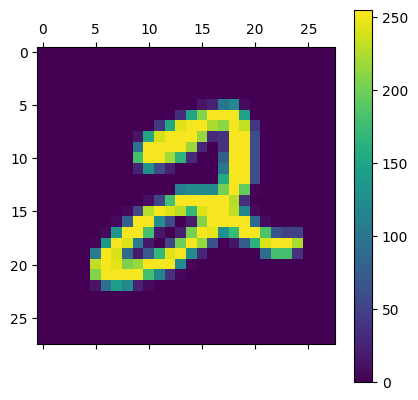

In [6]:
import matplotlib.pyplot as plt
plt.matshow(xtrain_original[5])
plt.colorbar()
plt.show()


In [7]:
#Verifying that the corresponding "true" label is correct
print(ytrain_original[5])

2


Reshape and Normalize

In [8]:
#Add an axis to serve as a channel
xtrain=xtrain_original.reshape((60000,28,28,1))
xvalid=xvalid_original.reshape((10000,28,28,1))
#Normalize the inputs
xtrain=xtrain/255
xvalid=xvalid/255

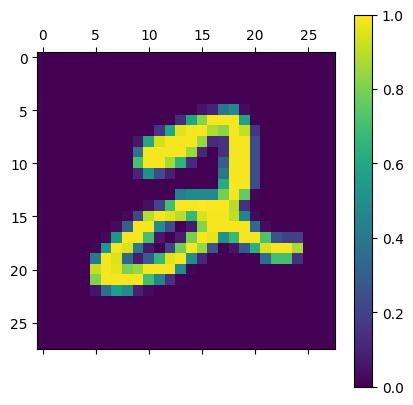

In [10]:
#Verify whether normalization worked
plt.matshow(xtrain[5,:,:,0])
plt.colorbar()
plt.show()

Reformat labels (One-hot encode them)

In [11]:
print("Before")
print(ytrain_original.shape)
print(ytrain_original[2])

Before
(60000,)
4


In [12]:
#one-hot encode to output labels
ytrain=tensorflow.keras.utils.to_categorical(ytrain_original)
yvalid=tensorflow.keras.utils.to_categorical(yvalid_original)
print("After")
print(ytrain.shape)
print(ytrain[2])

After
(60000, 10)
[0. 0. 0. 0. 1. 0. 0. 0. 0. 0.]


Creating a neural network with the following architecture:


*   First layer has 4 filters (kernels) each of size 3x3
*   Second layer is the flatten layer
*   Last layer is a dense layer which has set of 10 neurons- one for each of the 10 digit labels
    
    Notes:


*   Only the dense layers can be used to achieve digit identification-CNNs usually deliver better accuracy
*   Convo2D is the convolutional layer-Conv2D(filters,(filter_height,filter_width),(activation),(input_shape))
*  The filyer will move through the image pixel by pixel (or convolves) around the image picking up values- output of 26x26
* The last layer of 10 neurons for digits between 0 to 9 ->Each neuron will contain values between 0-1
* We have a probability for a digit prediction-the highest probability will be the model's prediction for the digit 





In [13]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense,Conv2D,Flatten

model=Sequential()
model.add(Conv2D(4,(3,3),activation='relu',input_shape=xtrain[0,: ,:, :].shape))
#model.add(Conv2D(4,(3,3),activation='relu'))
model.add(Flatten())
#model.add(Dense(10,activation='relu'))
model.add(Dense(10,activation='softmax'))
model.summary()


Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 26, 26, 4)         40        
                                                                 
 flatten (Flatten)           (None, 2704)              0         
                                                                 
 dense (Dense)               (None, 10)                27050     
                                                                 
Total params: 27,090
Trainable params: 27,090
Non-trainable params: 0
_________________________________________________________________


Compiling and Training the Model

In [14]:
model.compile(optimizer='adam',loss='categorical_crossentropy',metrics=['accuracy'])
#Training the model
history=model.fit(xtrain,ytrain,validation_data=(xvalid,yvalid),epochs=4,batch_size=64)

Epoch 1/4
938/938 [==============================] - 13s 4ms/step - loss: 0.3548 - accuracy: 0.9002 - val_loss: 0.2313 - val_accuracy: 0.9351
Epoch 2/4
938/938 [==============================] - 4s 4ms/step - loss: 0.2109 - accuracy: 0.9388 - val_loss: 0.1837 - val_accuracy: 0.9481
Epoch 3/4
938/938 [==============================] - 3s 4ms/step - loss: 0.1617 - accuracy: 0.9531 - val_loss: 0.1494 - val_accuracy: 0.9558
Epoch 4/4
938/938 [==============================] - 4s 4ms/step - loss: 0.1260 - accuracy: 0.9633 - val_loss: 0.1136 - val_accuracy: 0.9671


Learning Curve

In [15]:
print(history.params)

{'verbose': 1, 'epochs': 4, 'steps': 938}


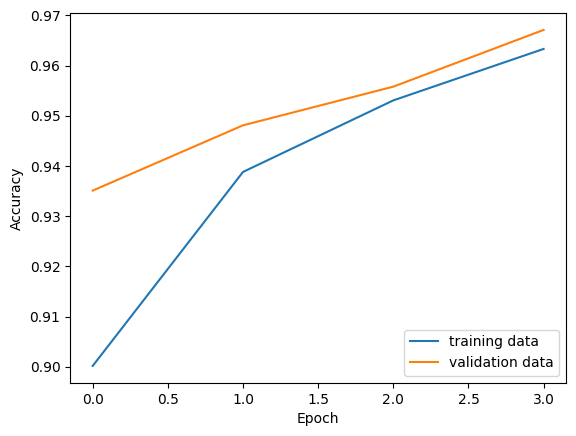

In [16]:
plt.plot((history.history['accuracy']))
plt.plot((history.history['val_accuracy']))
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['training data','validation data'],loc='lower right')
plt.show()


Evaluate the model on the validation set

In [17]:
validation_loss,validation_acc=model.evaluate(xvalid,yvalid)
print('validation_acc:',validation_acc)

313/313 [==============================] - 1s 2ms/step - loss: 0.1136 - accuracy: 0.9671
validation_acc: 0.9671000242233276


Check what the model predicts

An example of what the model has predicted and comparison with the true classes

[0.00 0.00 0.00 0.00 0.00 0.00 0.00 1.00 0.00 0.00]


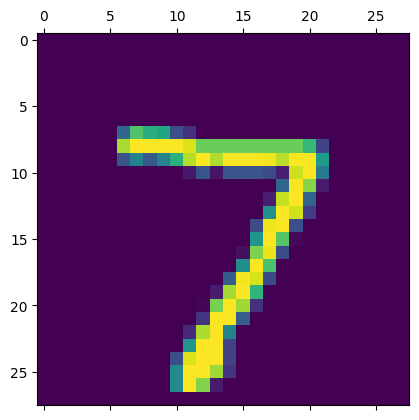

In [21]:
import numpy as np
np.set_printoptions(formatter={'float':lambda x:"{0:0.2f}".format(x)})

print(yvalid[0])
plt.matshow(xvalid[0,:,:,0])
plt.show()



*   Visualising the predictions on the unseen data-this is going to show us how the model is predicting the images
*   The output is an array of values where each value is associated to a digit



In [22]:
predictions=model.predict(xvalid)
print(predictions[0])

313/313 [==============================] - 1s 2ms/step
[0.00 0.00 0.00 0.00 0.00 0.00 0.00 1.00 0.00 0.00]


In [23]:
np.set_printoptions(formatter={'float':lambda x:"{0:0.7f}".format(x)})
print(predictions[0])

[0.0000003 0.0000000 0.0000011 0.0003247 0.0000000 0.0000009 0.0000000
 0.9996364 0.0000008 0.0000357]


After rounding we can see the output of the prediction

In [24]:
print(predictions[0].round())

[0.0000000 0.0000000 0.0000000 0.0000000 0.0000000 0.0000000 0.0000000
 1.0000000 0.0000000 0.0000000]


How can the model's performance be improved?


*   Use GPU for training
*   Increase the number of epochs
*   Increase the number of filters and subsequent layers
*   Add more layers into the subsequent layers
*   Increase the number of Conv2D layers(i.e. add extra layers)
* What is the baseline accuracy (i.e the accuracy of a random model)



Visualising the learned filters of the model

In [25]:
import matplotlib.pyplot as plt
import numpy as np

In [26]:
# Extract the filter weights from the model
conv_weights = model.layers[0].get_weights()[0]  # First Conv2D layer

In [27]:
# Reshape the filter weights
conv_weights = np.moveaxis(conv_weights, -1, 0)  # Move the output channels axis to the front


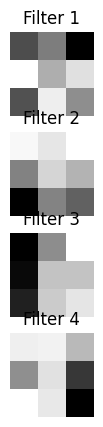

In [28]:
# Visualize the filters
fig, axs = plt.subplots(nrows=conv_weights.shape[0], ncols=1, figsize=(5, 5))

for i in range(conv_weights.shape[0]):
    axs[i].imshow(conv_weights[i, :, :], cmap='gray')
    axs[i].axis('off')
    axs[i].set_title(f'Filter {i+1}')

plt.show()